# 03_Modeling

## Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import umap
import joblib
from sklearn.mixture import GaussianMixture
from visualization import compare_gmm_params,plot_gmm_metrics_comparison

## Load data

In [8]:
df = pd.read_csv('../data/processed/windowed_dataset_cleaned.csv')
X = df[df.columns.difference(['is_attack'])]
y = df['is_attack']

## GMM

### Selecting Hyperparameters

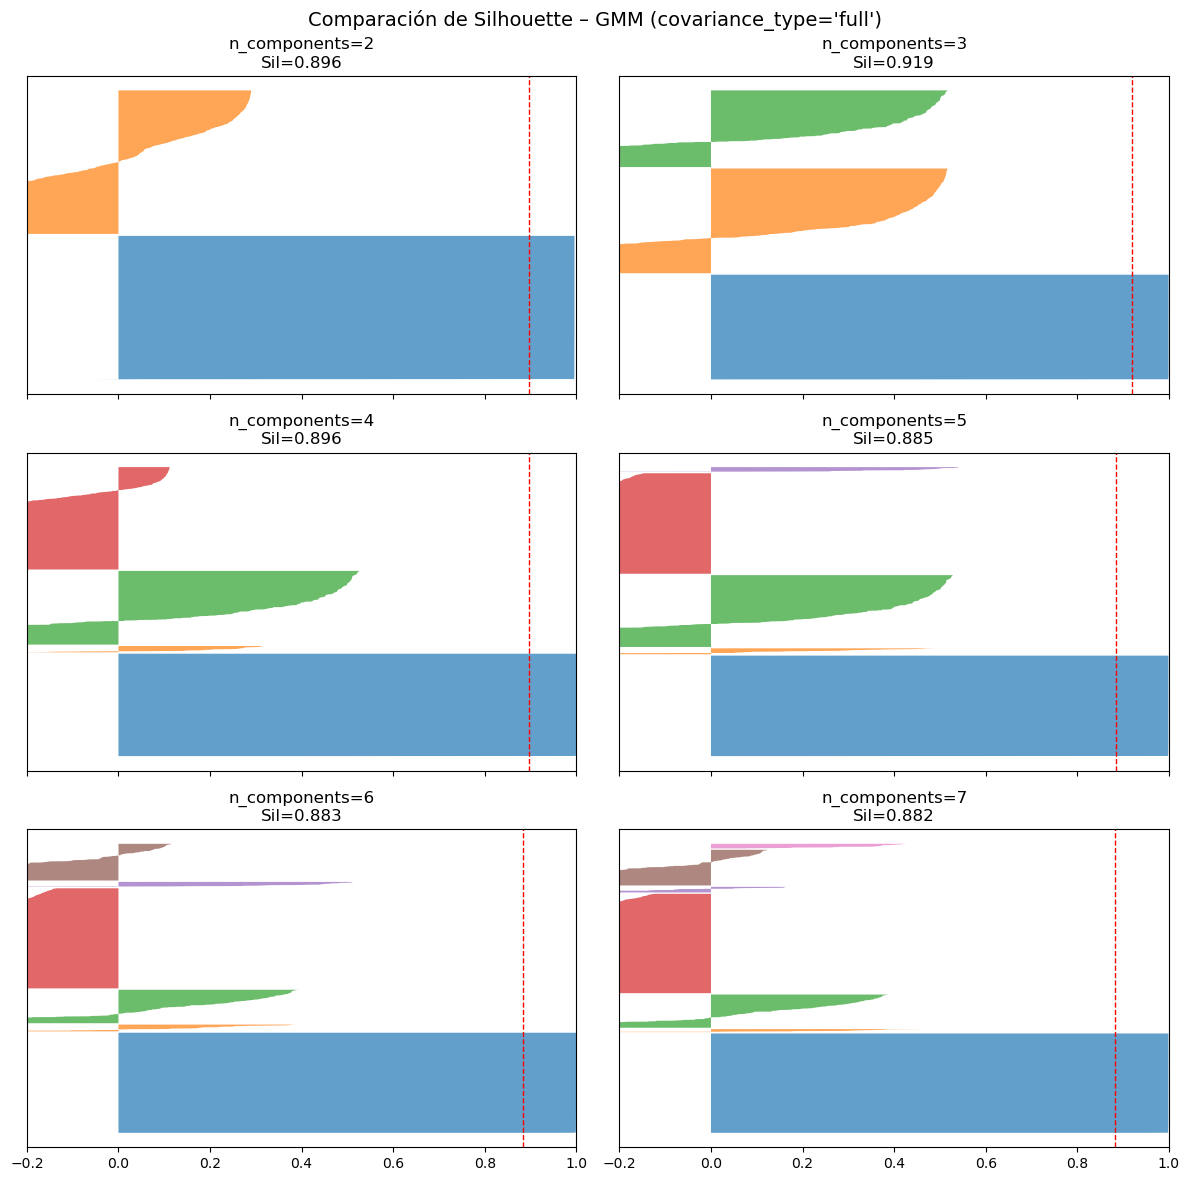

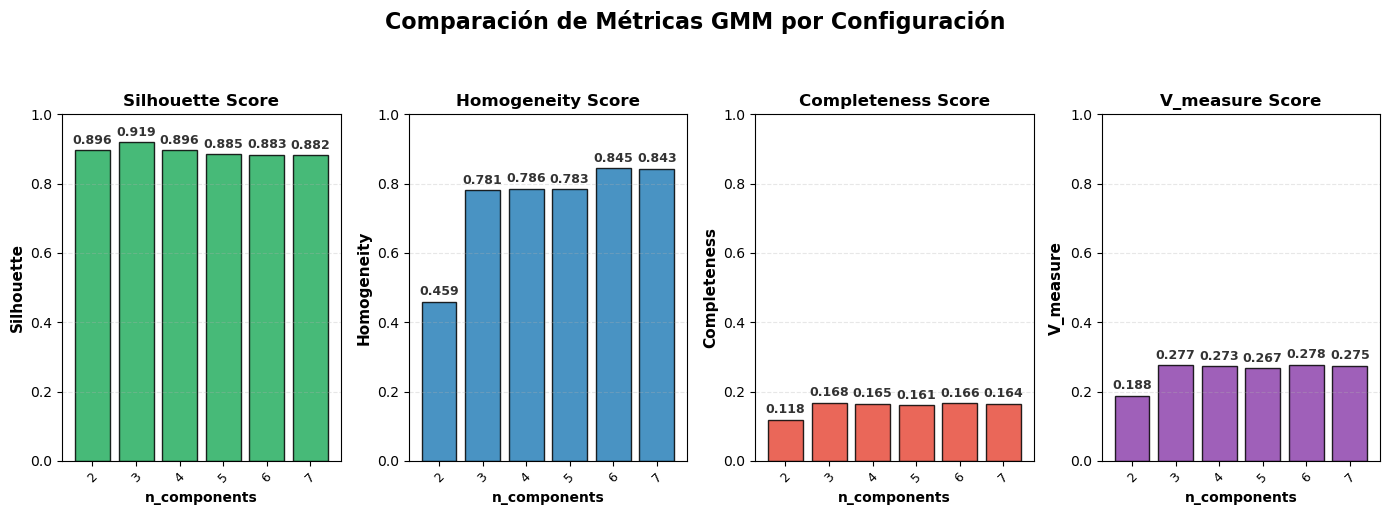

In [12]:
param_grid = [2, 3, 4, 5, 6, 7]

# Ejecuta la comparación
results, fig1 = compare_gmm_params(
    X, 
    param_grid,
    y_true=y,  # opcional
    covariance_type='full',  # puedes cambiar a 'tied', 'diag', 'spherical'
    random_state=42
)
plt.show()

# Visualiza las métricas
fig2 = plot_gmm_metrics_comparison(results)
plt.show()

### Fitting the model

In [13]:
gmm = GaussianMixture(
    n_components=3, # número de clusters
    covariance_type='full', # 'full', 'tied', 'diag', 'spherical' full: clusters = elipses libres (cualquier forma)
    reg_covar=1e-6,
    random_state=42
)

gmm_labels = gmm.fit_predict(X)

In [14]:
import umap

reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    n_components=2,
    metric='euclidean',
    random_state=42
)

X_umap = reducer.fit_transform(X)


/Users/taxi/miniconda3/envs/consoning/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/taxi/miniconda3/envs/consoning/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [15]:
import plotly.express as px

df_vis = df.copy()
df_vis['UMAP1'] = X_umap[:, 0]
df_vis['UMAP2'] = X_umap[:, 1]
df_vis['gmm_cluster'] = gmm_labels.astype(str)

fig = px.scatter(
    df_vis,
    x='UMAP1',
    y='UMAP2',
    color='gmm_cluster',
    hover_data=['is_attack'],
    title="UMAP + Gaussian Mixture clusters",
    width=900,
    height=700
)

fig.update_traces(marker=dict(size=6, opacity=0.8))
fig.update_layout(legend_title_text='GMM cluster')

fig.show()


In [16]:
pd.crosstab(df['is_attack'], gmm_labels)

col_0,0,1,2
is_attack,,,
0.0,21889,1530,240
1.0,0,0,346


## Save model

In [20]:
joblib.dump(gmm, "../models/gmm_model.joblib")

['../models/gmm_model.joblib']